In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

-- We will import iris flower data from seaborn library , and store in variable

In [ ]:
df=sns.load_dataset("iris")

- So we stored the iris dataset in df varabile , and will do EDA first , also visualize data

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df.shape

(150, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


- so this iris dataframe has no missing values , and it has records of 150 flowers where  first three column are integer and one column is object in all 150 rows

In [ ]:
df['species'].value_counts()

,count
species,
setosa,50
versicolor,50
virginica,50


In [ ]:
percentages = df['species'].value_counts() / len(df['species']) * 100
print(percentages.apply(lambda x: f'{x:.2f}%'))

species
setosa        33.33%
versicolor    33.33%
virginica     33.33%
Name: count, dtype: object


So we see that 33.33 percent is stosa, 33.33% is versicolor and 33.33 percent is virginica

In [ ]:
from sklearn.preprocessing import LabelEncoder


In [ ]:
Label_Encoder=LabelEncoder()

In [ ]:
df['species_encoded']=Label_Encoder.fit_transform(df['species'])

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_encoded
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [ ]:
df['species'].unique(),df['species_encoded'].unique()

(array(['setosa', 'versicolor', 'virginica'], dtype=object), array([0, 1, 2]))

-- The zero is assigned to setosa , 1 to versicolor and 2 to viriginca

In [ ]:
df1=df.drop('species_encoded',axis=1).copy()

- So we have kept one copy of the original form of data , so if there is any isuue , we will still maintain the orginality of data , which is stored in the df1 varaible

In [ ]:
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df.drop('species',axis=1,inplace=True)

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species_encoded
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


df.inf

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length     150 non-null    float64
 1   sepal_width      150 non-null    float64
 2   petal_length     150 non-null    float64
 3   petal_width      150 non-null    float64
 4   species_encoded  150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
df.dtypes

,0
sepal_length,float64
sepal_width,float64
petal_length,float64
petal_width,float64
species_encoded,int64


- Now all column are numerical , which can fed to ml alogirthm , but let's graphically visualize the data

In [ ]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,species_encoded
sepal_length,1.000000,-0.117570,0.871754,0.817941,0.782561
sepal_width,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal_length,0.871754,-0.428440,1.000000,0.962865,0.949035
petal_width,0.817941,-0.366126,0.962865,1.000000,0.956547
species_encoded,0.782561,-0.426658,0.949035,0.956547,1.000000


Text(50.722222222222214, 0.5, 'correlation with another column')

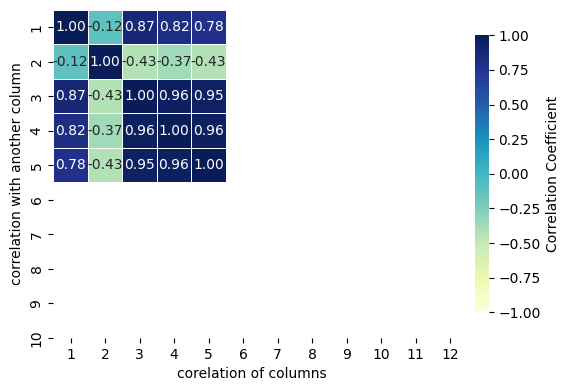

In [ ]:
sns.heatmap(df.corr(),  annot=True,
            fmt=".2f",
            cmap="YlGnBu",
            linewidths=0.5,
            linecolor='white',
            cbar=True,
            cbar_kws={"shrink": 0.75,
                      'label': 'Correlation Coefficient'},
            vmin=-1, vmax=1,
            center=0,
            square=True,
            xticklabels=range(1, 13),
            yticklabels=range(1, 11),
            )
plt.xlabel('corelation of columns')
plt.ylabel("correlation with another column")



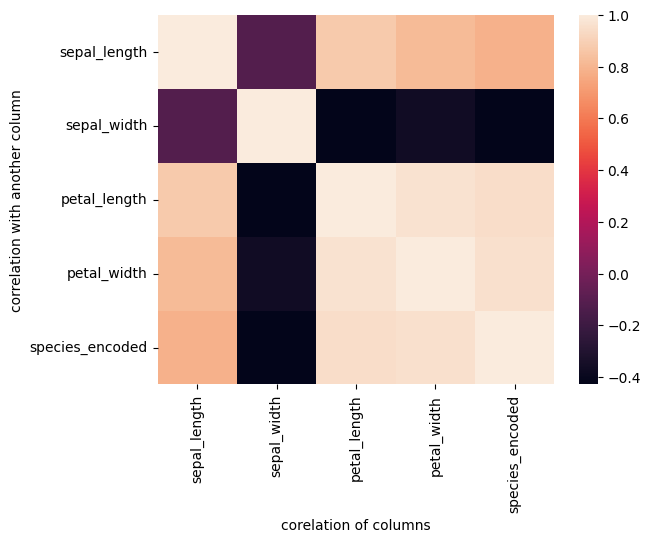

In [ ]:
sns.heatmap(df.corr()  )
plt.xlabel('corelation of columns')
plt.ylabel("correlation with another column")
plt.show()

In [ ]:
df.drop('species_encoded',axis=1).corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


- We see there is great positive corealtion of sepal length and sepal width and petal width they seem to increase togeter , but there is negative corelation of sepal_width  with petal length and petal width

<Axes: xlabel='sepal_length', ylabel='Count'>

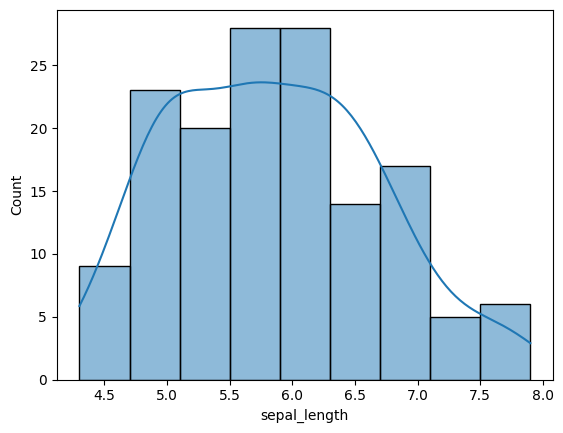

In [ ]:
sns.histplot(df['sepal_length'],kde=True)

# Let's make a function which will apply shapiro test to check normality also plot graph automatically

In [ ]:
from scipy import stats


In [ ]:
def check_normailty_function(column1):
  stat, p_value = stats.shapiro(column1)
  if p_value > 0.05:
    print(f"It is normally distributed ")
    print(sns.histplot(column1,kde=True),
          plt.xlabel("X axis "),
          plt.ylabel("y axis"),
          plt.show())
  else :

    print(sns.histplot(column1,kde=True),
          plt.xlabel("X axis "),
          plt.ylabel("y axis"),
          plt.show())
    print("Not normal")



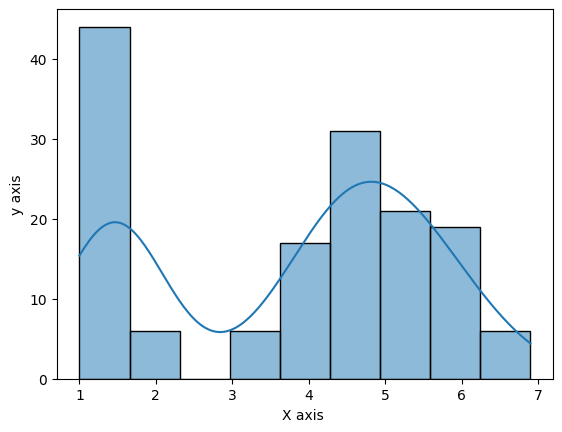

Axes(0.125,0.11;0.775x0.77) Text(0.5, 24.0, 'X axis ') Text(24.000000000000007, 0.5, 'y axis') None
Not normal


In [ ]:
check_normailty_function(df['petal_length'])

- So the column petal length is not normal which means it might have outlier

<ipython-input-52-5a049925c0d0>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='petal_length',  data=df,


Text(0, 0.5, 'Value')

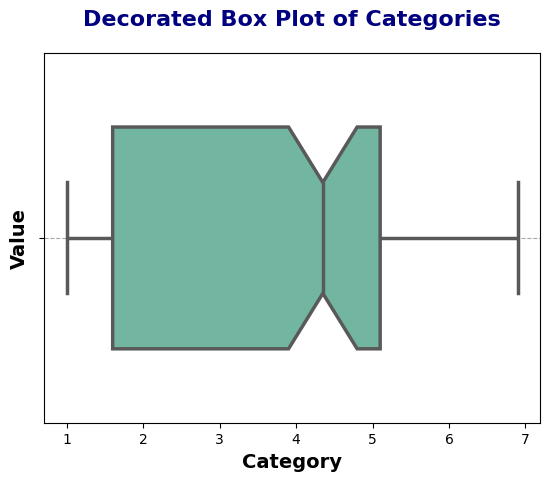

In [ ]:
sns.boxplot(x='petal_length',  data=df,
            notch=True,
            palette="Set2",
            linewidth=2.5,
            width=0.6,
            flierprops=dict(marker='o', color='red', markersize=8)
           )


plt.grid(True, which='both', axis='y', linestyle='--', color='gray', alpha=0.7)


plt.title('Decorated Box Plot of Categories', fontsize=16, fontweight='bold', color='navy', pad=20)
plt.xlabel('Category', fontsize=14, fontweight='bold')
plt.ylabel('Value', fontsize=14, fontweight='bold')

- We could not sense outliers even using box plot , so let's make a function of IQR

In [ ]:
def Find_outliers(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3-q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = [x for x in data if x < lower_bound or x > upper_bound]
    return outliers, lower_bound, upper_bound



In [ ]:
Find_outliers(df['petal_length'])

([], -3.649999999999999, 10.349999999999998)

So there are no outliers but still it is not normally distrbuted

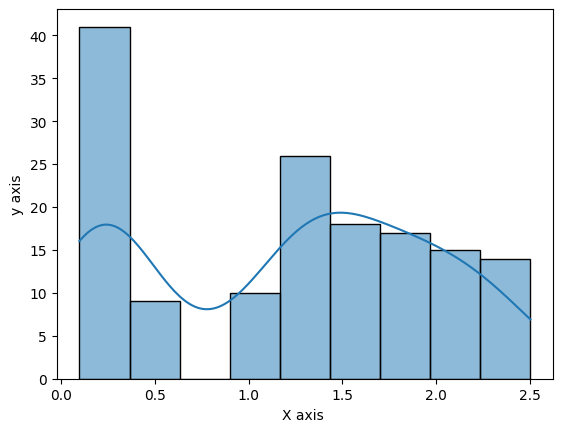

Axes(0.125,0.11;0.775x0.77) Text(0.5, 24.0, 'X axis ') Text(24.000000000000007, 0.5, 'y axis') None
Not normal


([], -1.95, 4.05)

In [ ]:
check_normailty_function(df['petal_width'])
Find_outliers(df['petal_width'])

- NOT NORMALLY DISTRIBUTED BUT STILL NO OUTLIERS

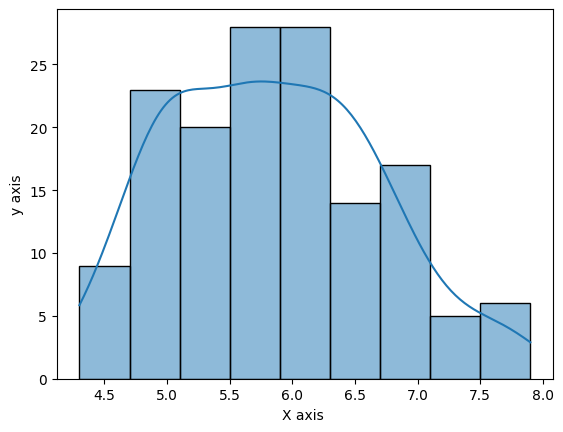

Axes(0.125,0.11;0.775x0.77) Text(0.5, 24.0, 'X axis ') Text(24.000000000000007, 0.5, 'y axis') None
Not normal


([], 3.1499999999999986, 8.350000000000001)

In [ ]:
check_normailty_function(df['sepal_length'])
Find_outliers(df['sepal_length'])

In [ ]:
df['sepal_length'] = np.log(df["sepal_length"] + 1)

It is normally distributed 


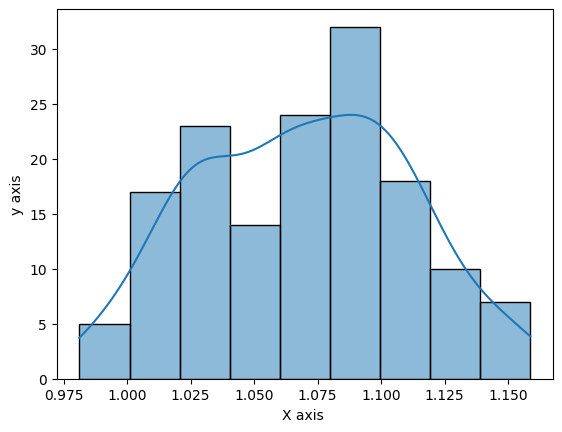

Axes(0.125,0.11;0.775x0.77) Text(0.5, 24.0, 'X axis ') Text(24.000000000000007, 0.5, 'y axis') None


([], 0.9327800484038442, 1.1989007716338027)

In [ ]:
check_normailty_function(df['sepal_length'])
Find_outliers(df['sepal_length'])

- So we made this normally distributed using log noraml

In [ ]:
df['petal_length']=df1['petal_length']

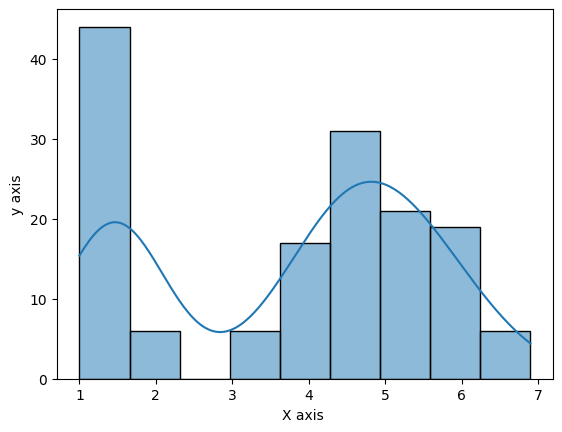

Axes(0.125,0.11;0.775x0.77) Text(0.5, 24.0, 'X axis ') Text(24.000000000000007, 0.5, 'y axis') None
Not normal


([], -3.649999999999999, 10.349999999999998)

In [ ]:
check_normailty_function(df['petal_length'])
Find_outliers(df['petal_length'])

In [ ]:
def noramlity_using_central_limit_theorem(df, column, sample_size, num_samples):
    sample_mean = []


    for _ in range(num_samples):
        sample = df[column].sample(sample_size, replace=True)
        sample_mean.append(sample.mean())

    return sample_mean


In [ ]:
df['petal_length']=noramlity_using_central_limit_theorem(df,'petal_length',30,150)

It is normally distributed 


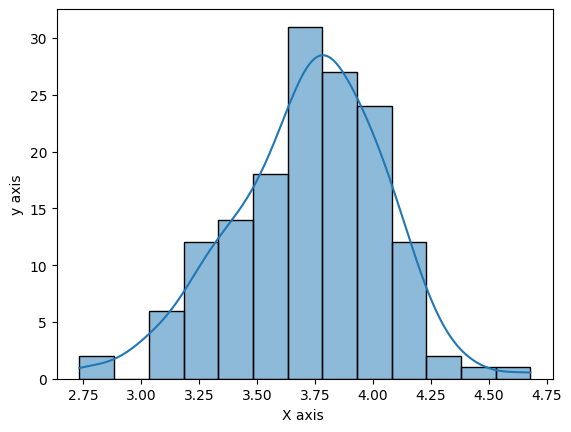

Axes(0.125,0.11;0.775x0.77) Text(0.5, 24.0, 'X axis ') Text(24.000000000000007, 0.5, 'y axis') None


([4.679999999999999, 2.7333333333333334, 2.8299999999999996],
 2.893333333333334,
 4.566666666666666)

In [ ]:
check_normailty_function(df['petal_length'])
Find_outliers(df['petal_length'])

- We made petal length normally distrubuted using central limit theorem

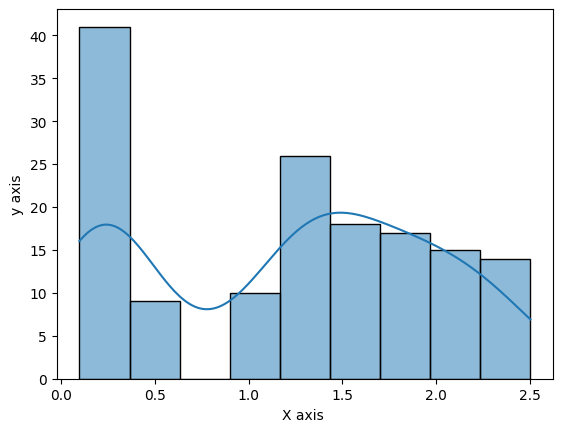

Axes(0.125,0.11;0.775x0.77) Text(0.5, 24.0, 'X axis ') Text(24.000000000000007, 0.5, 'y axis') None
Not normal


([], -1.95, 4.05)

In [ ]:
check_normailty_function(df['petal_width'])
Find_outliers(df['petal_width'])

In [ ]:
df['petal_width']=noramlity_using_central_limit_theorem(df,'petal_width',30,150)

It is normally distributed 


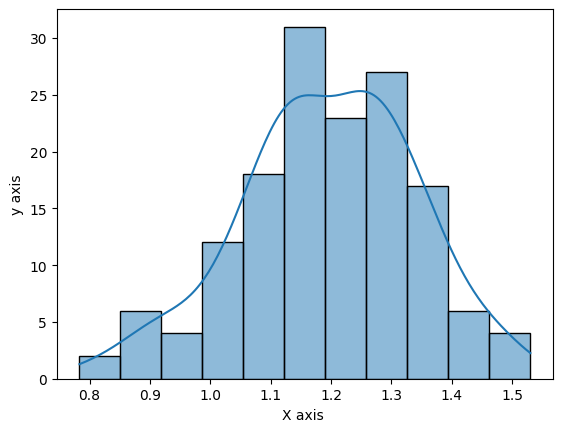

Axes(0.125,0.11;0.775x0.77) Text(0.5, 24.0, 'X axis ') Text(24.000000000000007, 0.5, 'y axis') None


([0.7833333333333332], 0.8183333333333335, 1.5716666666666663)

In [ ]:
check_normailty_function(df['petal_width'])
Find_outliers(df['petal_width'])

- So we made petal width normally distributed

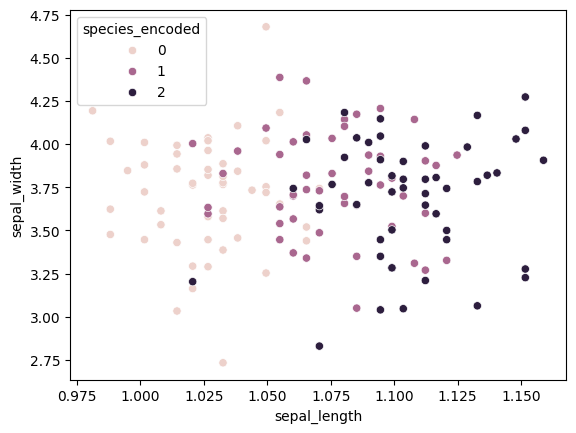

In [ ]:
sns.scatterplot(df,x='sepal_length',y='petal_length',hue='species_encoded')

plt.xlabel("sepal_length")
plt.ylabel("sepal_width")
plt.show()

In [ ]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species_encoded'],
      dtype='object')

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species_encoded
0,1.032575,3.5,3.766667,1.100000,0
1,1.020634,3.0,3.163333,1.126667,0
2,1.008128,3.2,3.533333,0.860000,0
3,1.001648,3.1,3.880000,1.483333,0
4,1.026672,3.6,3.963333,1.476667,0


# Let's make our macine learning model to predict the species of flower

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(df.iloc[:,:-1],df.iloc[:,-1],test_size=0.3,random_state=42)

In [ ]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
81,1.054940,2.4,3.636667,1.216667
133,1.094562,2.8,3.350000,1.100000
137,1.099106,3.1,3.503333,0.963333
75,1.107951,3.0,3.310000,1.313333
109,1.132735,3.6,4.166667,1.200000
...,...,...,...,...
71,1.085221,2.8,3.646667,1.383333
106,1.020634,2.5,3.203333,1.080000
14,1.070529,4.0,3.743333,0.900000
92,1.070529,2.6,3.730000,1.243333


In [ ]:
scaler=StandardScaler()

In [ ]:
scaler.fit(X_train)

StandardScaler()

In [ ]:
X_train_scaled=scaler.transform(X_train)

In [ ]:
X_test_scaled=scaler.transform(X_test)

In [ ]:
model=LogisticRegression()

In [ ]:
model.fit(X_train_scaled,y_train)


LogisticRegression()

In [ ]:
y_predicted=model.predict(X_test_scaled)

In [ ]:
confusion_matrix(y_test,y_predicted)

array([[19,  0,  0],
       [ 0,  7,  6],
       [ 0,  3, 10]])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print(f"The accuracy is {accuracy_score(y_test,y_predicted)*100} %")

The accuracy is 80.0 %
